## 🚗 **Saudi Arabia Used-Car Price Optimization for Syarah.com**

---

### 🎯 **SCQA: Business Framing**

**Situation:**
Sellers on syarah.com, an online used-car marketplace in Saudi Arabia, regularly list vehicles for sale. Setting the right asking price is crucial for achieving timely sales and maintaining marketplace efficiency.

**Complication:**
Many sellers inaccurately price their vehicles due to limited market insights. Overpriced cars lead to slow sales and reduced marketplace liquidity, while underpriced cars result in lost profits for sellers and lower revenues for the platform.

**Question:**
How can syarah.com help sellers reliably set optimal asking prices to minimize pricing errors, accelerate sales, and improve both seller profitability and overall marketplace performance?

**Answer:**
Develop and deploy a robust machine-learning model that predicts accurate market-aligned prices for used cars, significantly reducing pricing errors. This will increase marketplace liquidity, accelerate sales, and maximize profit for both sellers and syarah.com.

---

### 📊 **Metrics & Evaluation**

**Primary Metric:**

* **Mean Absolute Error (MAE)** in Saudi Riyals (SAR)

  * Clear interpretation: "On average, our model is accurate within ±2,800 SAR."
  * Symmetric penalty for both overpriced and underpriced listings.
  * Robust against extreme high-price outliers.

**Companion Metric:**

* **Median Absolute Percentage Error (MdAPE)**

  * Provides fairness across different price ranges.
  * Offers clear interpretability: "Half our predictions fall within ±X% of actual prices."

**Business Impact Evaluation:**

* Based on model accuracy (\~5% MAE), assume predicted prices closely represent "true market value."
* Classify listings as:

  * **Overpriced:** Actual price > 5% above model prediction.
  * **Underpriced:** Actual price > 5% below model prediction.
  * **Well-priced:** Within ±5% range.
* Quantify business impact using:

  * **Underpriced cars:** Calculate potential profit recovered (price gap).
  * **Overpriced cars:** Estimate faster sale (e.g., assume 1 selling day saved per 2% price correction).

---

### 🤖 **Final Model & Benchmark Plan**

**Baseline Model:**

* **ElasticNet linear regression** (interpretable and simple)

  * Expected MAE ≈ 6,700 SAR.

**Final Selected Model:**

* ✅ **CatBoost Regressor**

  * Handles categorical variables natively (no need for extensive encoding).
  * Provides built-in interpretability (SHAP values).
  * Expected MAE ≈ 2,800 SAR (≈5% of average car price).

**Additional Comparison Models (Optional):**

* ✅ **XGBoost / LightGBM**

  * For validation, robustness, or slight performance gains.

---

### 🔍 **Data Preparation & Feature Engineering**

**Data Handling:**

* Remove listings marked as "Negotiable" (`Price = 0`)—mentor-confirmed safe.
* Light-touch outlier treatment (top 1% or ±3σ only) to match hidden test conditions.

**Feature Engineering (Minimal, business-relevant):**

* `CarAge = 2025 - Year`
* Raw categorical features (`Make`, `Type`, `Region`, `Gear_Type`, `Options`) for CatBoost.

---

### 📉 **Model Interpretability**

* Utilize **SHAP plots** (from CatBoost) to visually communicate feature importance to stakeholders.
* Identify clear business insights (key pricing factors like Age, Mileage, Brand).

---

### 📈 **Deployment Scenario (Hypothetical)**

* Model integrated directly into syarah.com’s user interface.
* Sellers receive immediate, accurate price recommendations upon listing cars.
* Marketplace moderators leverage predictions to identify and flag mispriced listings.

---

### 🧪 **Final Evaluation Plan**

* Perform cross-validation (80/20 split, random or grouped by `Make`).
* Evaluate and report metrics:

  * MAE (primary) and MdAPE (companion).
* Calculate and clearly present business impact (money saved, sales accelerated).

---

### 🚩 **Final Project Summary Table**

| Aspect               | Final Decision                                                          |
| -------------------- | ----------------------------------------------------------------------- |
| **Stakeholder/User** | Hypothetical used-car marketplace (syarah.com)                          |
| **Primary Metric**   | Mean Absolute Error (MAE) in SAR (\~2,800 target, \~5% of avg price)    |
| **Companion Metric** | Median Absolute Percentage Error (MdAPE)                                |
| **Benchmark Model**  | ElasticNet linear regression (\~6,700 SAR MAE)                          |
| **Final Model**      | CatBoost Regressor (\~2,800 SAR MAE)                                    |
| **Optional Models**  | XGBoost, LightGBM                                                       |
| **Data Handling**    | Drop Negotiable prices, minimal outlier removal (top 1% or ±3σ)         |
| **Business Impact**  | ±5% threshold for mispricing: calculate profit recovered & faster sales |
| **Interpretability** | SHAP values (built-in CatBoost)                                         |

---

### ✨ **Concise One-Liner Project Narrative**

> "**I built a CatBoost model to help syarah.com accurately price used cars, significantly reducing typical seller mispricing errors, saving thousands of Riyals per car, accelerating marketplace sales, and enhancing overall platform performance.**"

1. Normally, when the dataset has no missing data, do we still put in imputers in the model just in case the new real-world data has some missing data?
2. What if the test set has a negotiable price in it? That would ruin my model performance especially if I decide to drop the negotiable rows as I do not have control over the test dataset
3. Is choosing boosting methods like CatBoost or XGBoost and further Ensemble Methods fine? Or is it too much for a task like this and better to go for simpler models like multiple linear regression?

# Import Libraries & Dataset

In [2]:
import pandas as pd

In [3]:
DATASET_PATH = '../data/data_saudi_used_cars.csv'

In [4]:
df = pd.read_csv(DATASET_PATH)
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


# Data Understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [6]:
df.isna().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

From the result above, we have 5624 rows of data with no missing values. We have 6 categorical columns, 1 boolean column, and 4 numerical columns. All data types looks correct except `Price` (need a deeper look and consider converting it into a float).

In [7]:
df.duplicated().sum()

4

In [8]:
df[df.duplicated(keep=False)]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
236,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
540,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
2012,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
3631,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0


There are 4 exact duplicates found in the dataset. After inspection, it is safe to remove these duplicates since these duplicates do not contain any meaningful data/context for our predictive model.

In [9]:
df = df.drop_duplicates()
df.shape[0]

5620

In [10]:
df.describe(include='all')

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
count,5620,5620,5620,5620,5620,5620,5620.000000,5620.000000,5.620000e+03,5620,5620.000000
unique,347,27,58,2,4,3,NaN,NaN,NaN,2,NaN
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,NaN,NaN,NaN,False,NaN
freq,269,2270,1430,4871,4184,2232,NaN,NaN,NaN,3825,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.100356,3.296299,1.509222e+05,NaN,53086.404448
std,NaN,NaN,NaN,NaN,NaN,NaN,5.793003,1.515253,3.829633e+05,NaN,70175.153207
min,NaN,NaN,NaN,NaN,NaN,NaN,1963.000000,1.000000,1.000000e+02,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,2.000000,3.800000e+04,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,3.000000,1.030000e+05,NaN,36500.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,4.500000,1.960000e+05,NaN,73000.000000


## 📊 Initial Data Exploration Summary

### 🧾 Dataset Overview
- **Total Rows**: 5,620 (after removing 4 exact duplicates)
- **No missing values** detected
- **11 columns**: 6 categorical, 1 boolean, 4 numerical

---

### 🔍 Categorical Features
- **High Cardinality**:
  - `Type`: 347 unique models
  - `Make`: 58 brands
  - `Region`: 27 city/area categories
- **Top Make**: Toyota (25%)
- **Top Model**: Land Cruiser
- **Top Region**: Riyadh (~40%)
- **Gear Type**: Mostly Automatic (~87%)
- **Origin**: Dominated by Saudi cars
- **Options**: Mostly Full

> ⚠️ **Imbalanced categories** and **high cardinality** may affect encoding and model generalization.  
> Consider using tree-based models (e.g., **CatBoost**) or advanced encoding (e.g., **target encoding**) to handle this efficiently.

---

### 🔢 Numerical Features
| Feature      | Min     | Median   | Mean     | Max       | Notes                         |
|--------------|---------|----------|----------|-----------|-------------------------------|
| **Year**     | 1963    | 2016     | 2014     | 2022      | Mostly post-2010 cars         |
| **Engine_Size** | 1.0  | 3.0      | 3.3      | 9.0       | Typical midsize engines       |
| **Mileage**  | 100     | 103,000  | 151,000  | 20,000,000| Contains extreme outliers     |
| **Price (SAR)**| 0     | 36,500   | 53,086   | 850,000   | 25% of data has Price = 0     |

---

### ✅ Key Insights
- Remove or handle **Price = 0** rows (marked "Negotiable")
- **Mileage** has unrealistic outliers (needs capping or removal)
- Consider **log-transforming Price & Mileage**
- Watch out for **imbalanced categories**
- **High cardinality** may require special encoding (CatBoost, etc.)

---

### 📌 Next Steps
- Outlier removal (e.g., mileage > 1M km)
- Strategy for "Negotiable" price rows
- Feature encoding & transformations
- Ready for EDA & preprocessing

# Detailed Features Data Exploration

In this section, we'll explore each feature in more detail to understand more about the data that we have

In [11]:
df.columns

Index(['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Year',
       'Engine_Size', 'Mileage', 'Negotiable', 'Price'],
      dtype='object')

## Type

In [ ]:
# 1. Quick summary statistics
print("Unique Type count:", df['Type'].nunique())

# 2. Find possible typos/near-duplicates (trailing spaces, different case)
types_raw = pd.Series(df['Type'].unique())
suspect_types = types_raw[types_raw.str.strip().str.lower().duplicated(keep=False)]
print("\nPossible near-duplicate or inconsistent Type names:")
print(suspect_types)

Unique Type count: 347

Possible near-duplicate or inconsistent Type names:
Series([], dtype: object)


In [49]:
df['Type'].value_counts()

Type
Land Cruiser    269
Camry           233
Hilux           207
Accent          174
Yukon           162
               ... 
Nativa            1
360               1
GC7               1
CT5               1
S8                1
Name: count, Length: 347, dtype: int64

In [34]:
print("\nTop 20 most common Types:")
print(df['Type'].value_counts().head(20))

# Calculate the percentage of data represented by top 20 car types
top_types = df['Type'].value_counts().head(20)
top_20_percentage = top_types.sum() / len(df) * 100

# Print the percentage
print(f"\nTop 20 Types represent {top_20_percentage:.2f}% of all cars")

# Find the minimum and maximum counts in the top 20
max_value = top_types.max()
max_index = top_types.idxmax()
min_value = top_types.tail(1).values[0]
min_index = 19  # Index of the 20th item

print(f"Most common: {max_index} ({max_value} cars)")
print(f"20th most common: {top_types.index[-1]} ({min_value} cars)")


Top 20 most common Types:
Type
Land Cruiser    269
Camry           233
Hilux           207
Accent          174
Yukon           162
Sonata          156
Tahoe           150
Taurus          143
Elantra         131
Corolla         110
Expedition      107
Furniture        94
Suburban         90
Patrol           79
Prado            79
Accord           77
S                76
ES               75
Range Rover      75
Yaris            74
Name: count, dtype: int64

Top 20 Types represent 45.57% of all cars
Most common: Land Cruiser (269 cars)
20th most common: Yaris (74 cars)


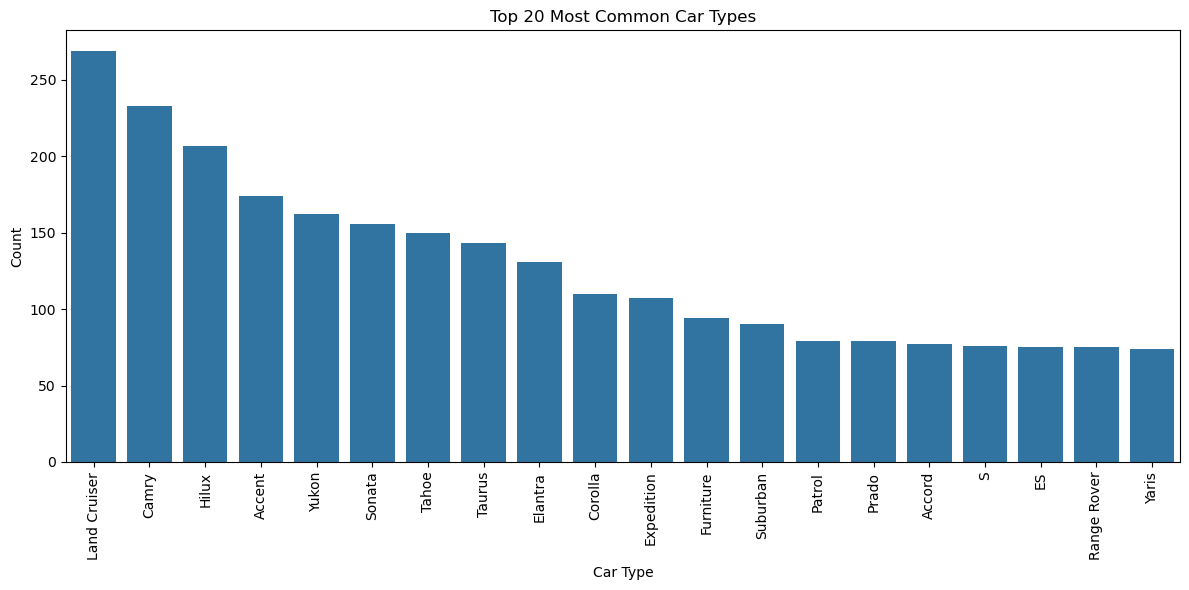

In [35]:
# Visualization: Bar chart of top 20 Types
plt.figure(figsize=(12, 6))
sns.barplot(x=top_types.index, y=top_types.values)
plt.title('Top 20 Most Common Car Types')
plt.ylabel('Count')
plt.xlabel('Car Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Top 70 types account for 80% of the data.
The 80th percentile car type is: Flex
These top 70 models represent 20.17% of all unique car types/models, and they represent 80.28% of all cars in the dataset.


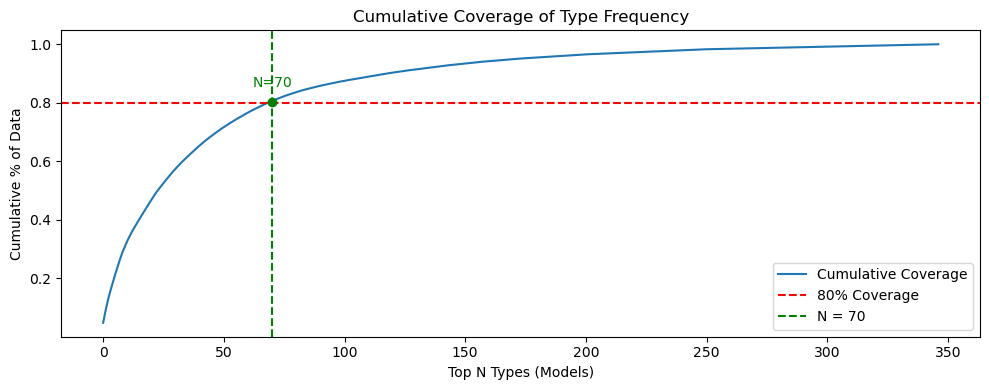

In [43]:
# Frequency table
type_counts = df['Type'].value_counts()

# Cumulative sum
cumsum = type_counts.cumsum() / type_counts.sum()

# Find N where cumulative sum >= 80%
pareto_80 = (cumsum >= 0.8).idxmax()  # Gives the actual Type (model) name
N_80 = (cumsum >= 0.8).argmax() + 1   # +1 because index is zero-based

# Calculate the percentage that top N_80 models represent
top_n80_percentage = cumsum.values[N_80-1] * 100
percentage_of_unique_types = (N_80 / len(type_counts)) * 100

print(f"Top {N_80} types account for 80% of the data.")
print(f"The 80th percentile car type is: {pareto_80}")
print(f"These top {N_80} models represent {percentage_of_unique_types:.2f}% of all unique car types/models, and they represent {top_n80_percentage:.2f}% of all cars in the dataset.")

# Plot with annotation
plt.figure(figsize=(10, 4))
plt.plot(cumsum.values, label='Cumulative Coverage')
plt.axhline(0.8, color='r', linestyle='--', label='80% Coverage')
plt.axvline(N_80, color='g', linestyle='--', label=f'N = {N_80}')
plt.scatter(N_80, cumsum.values[N_80-1], color='g', zorder=5)
plt.text(N_80, cumsum.values[N_80-1]+0.05, f'N={N_80}', color='g', ha='center')
plt.title('Cumulative Coverage of Type Frequency')
plt.xlabel('Top N Types (Models)')
plt.ylabel('Cumulative % of Data')
plt.legend()
plt.tight_layout()
plt.show()

In [48]:
# 6. Find "rare" Types (less than 10 rows)
rare_types = type_counts[type_counts < 10]
rare_percentage = (len(rare_types) / len(type_counts)) * 100
print(f"\nNumber of rare Types (<10 rows): {len(rare_types)} out of {len(type_counts)} total Types ({rare_percentage:.2f}%)")
print("Example rare Types:", rare_types.head())


Number of rare Types (<10 rows): 250 out of 347 total Types (72.05%)
Example rare Types: Type
Seven         9
Optra         9
Copper        9
Blazer        9
Echo Sport    8
Name: count, dtype: int64


72% of car types in the dataset have less than 10 rows, which might be a limitation for the predictive model for these rare cars in the real-world dataset.

### 🔍 Feature Analysis: `Type` (Car Model)

- **Unique Values**: 347 car types (high cardinality)
- **Top Models**: Land Cruiser, Camry, Hilux dominate the dataset
- **Skewed Distribution**:
  - Top 70 models (~20% of types) cover **80% of the data**
  - **72%** of types appear in **<10 rows** (rare or niche)

- **Data Quality**: No duplicate/typo issues detected (e.g., spacing/casing)

### ⚠️ Implications
- The model will learn best for popular models, but will likely be unreliable for rare models with very few examples.
- Will consider grouping rare types as `"Other"` to reduce noise
- Strong case of **Pareto distribution (80/20 rule)**

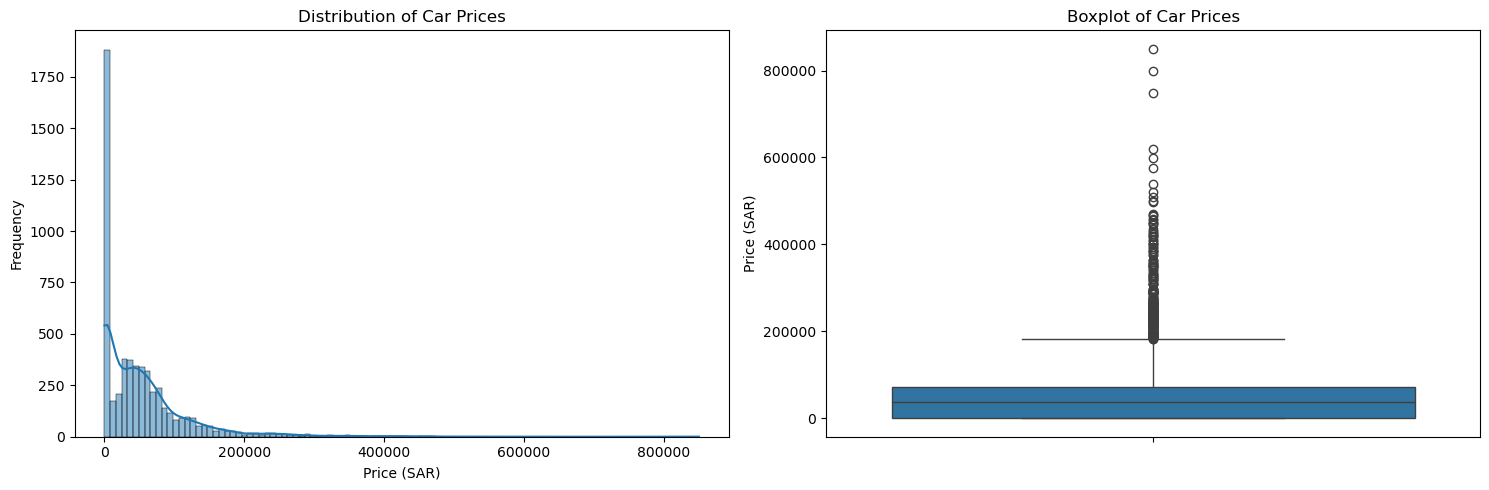

In [13]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot histogram with KDE
sns.histplot(df['Price'], kde=True, ax=ax1)
ax1.set_title('Distribution of Car Prices')
ax1.set_xlabel('Price (SAR)')
ax1.set_ylabel('Frequency')

# Plot boxplot
sns.boxplot(y=df['Price'], ax=ax2)
ax2.set_title('Boxplot of Car Prices')
ax2.set_ylabel('Price (SAR)')

plt.tight_layout()
plt.show()

In [14]:
# Calculate IQR for Price
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values below (Q1 - 1.5*IQR) or above (Q3 + 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

# Count outliers and calculate percentage
outlier_count = len(outliers)
outlier_percentage = (outlier_count / len(df)) * 100

print(f"Number of outliers: {outlier_count}")
print(f"Percentage of outliers: {outlier_percentage:.2f}%")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

# Display statistics of outliers
print("\nStatistics of outliers:")
print(outliers['Price'].describe())

Number of outliers: 261
Percentage of outliers: 4.64%
Lower bound: -109500.00
Upper bound: 182500.00

Statistics of outliers:
count       261.000000
mean     284848.275862
std      102655.374765
min      183000.000000
25%      220000.000000
50%      251500.000000
75%      325000.000000
max      850000.000000
Name: Price, dtype: float64


### Test after removing Negotiable prices

In [15]:
# Calculate the number of rows with Negotiable as True
negotiable_true_count = df['Negotiable'].sum()

# Calculate the percentage
negotiable_true_percentage = (negotiable_true_count / len(df)) * 100

print(f"Number of cars with Negotiable=True: {negotiable_true_count}")
print(f"Percentage of cars with Negotiable=True: {negotiable_true_percentage:.2f}%")

# Check how many of these have Price = 0
negotiable_zero_price = df[(df['Negotiable'] == True) & (df['Price'] == 0)]
print(f"\nNumber of negotiable cars with Price=0: {len(negotiable_zero_price)}")
print(f"Percentage of negotiable cars with Price=0: {(len(negotiable_zero_price) / negotiable_true_count) * 100:.2f}%")

Number of cars with Negotiable=True: 1795
Percentage of cars with Negotiable=True: 31.94%

Number of negotiable cars with Price=0: 1795
Percentage of negotiable cars with Price=0: 100.00%


In [16]:
df_filtered = df[df['Price'] > 0]

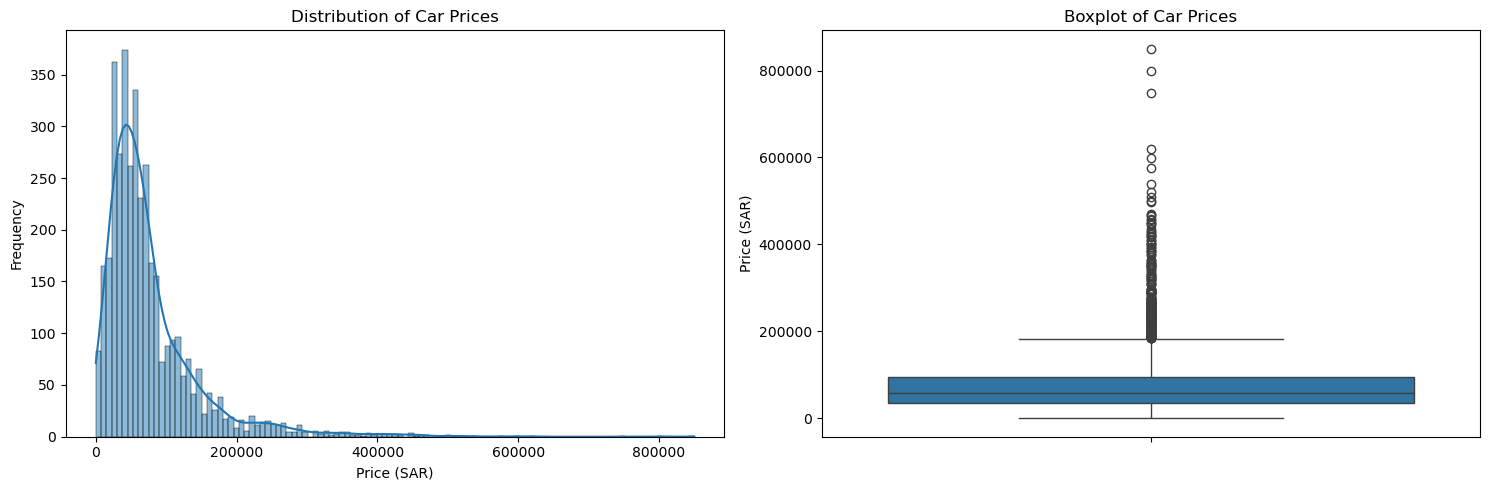

In [17]:
# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot histogram with KDE
sns.histplot(df_filtered['Price'], kde=True, ax=ax1)
ax1.set_title('Distribution of Car Prices')
ax1.set_xlabel('Price (SAR)')
ax1.set_ylabel('Frequency')

# Plot boxplot
sns.boxplot(y=df_filtered['Price'], ax=ax2)
ax2.set_title('Boxplot of Car Prices')
ax2.set_ylabel('Price (SAR)')

plt.tight_layout()
plt.show()

In [18]:
# Calculate IQR for Price
Q1 = df_filtered['Price'].quantile(0.25)
Q3 = df_filtered['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values below (Q1 - 1.5*IQR) or above (Q3 + 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_filtered[(df_filtered['Price'] < lower_bound) | (df_filtered['Price'] > upper_bound)]

# Count outliers and calculate percentage
outlier_count = len(outliers)
outlier_percentage = (outlier_count / len(df_filtered)) * 100

print(f"Number of outliers: {outlier_count}")
print(f"Percentage of outliers: {outlier_percentage:.2f}%")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

# Display statistics of outliers
print("\nStatistics of outliers:")
print(outliers['Price'].describe())

Number of outliers: 259
Percentage of outliers: 6.77%
Lower bound: -53875.00
Upper bound: 183125.00

Statistics of outliers:
count       259.000000
mean     285634.749035
std      102658.582321
min      185000.000000
25%      220000.000000
50%      252000.000000
75%      325000.000000
max      850000.000000
Name: Price, dtype: float64
